In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df=pd.read_csv('height-weight.csv')

In [23]:
df.head(10)

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


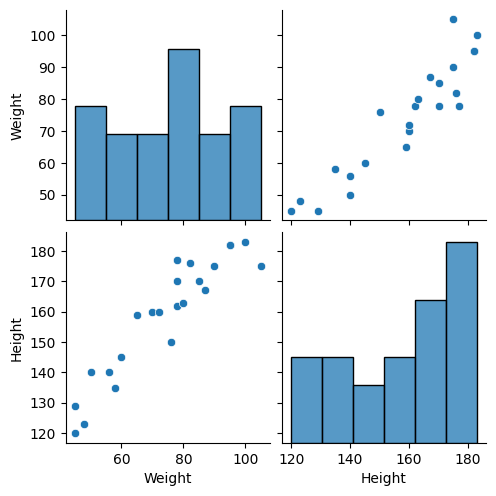

In [26]:
sns.pairplot(df[['Weight','Height']])

In [19]:
import seaborn as sns


In [27]:
df.isnull()

,Weight,Height
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [29]:
df.count()

Weight    23
Height    23
dtype: int64

In [43]:
sorted_height=np.sort(df[['Height']])

In [44]:
print(sorted_height)

[[120]
 [135]
 [123]
 [145]
 [160]
 [162]
 [163]
 [175]
 [182]
 [170]
 [176]
 [182]
 [175]
 [183]
 [170]
 [177]
 [140]
 [159]
 [150]
 [167]
 [129]
 [140]
 [160]]


In [45]:
sorted_data=np.array(df[['Height','Weight']])

In [47]:
print(sorted_data.sort())

None


In [60]:
y=df[['Height']]

In [61]:
np.array(y).shape

(23, 1)

In [62]:
x=df[['Weight']]

In [65]:
x.count()

Weight    23
dtype: int64

In [63]:
np.array(x).shape

(23, 1)

In [54]:
from sklearn.model_selection import train_test_split 
#train the test split 

In [57]:
X_train ,x_test ,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [66]:
X_train.count()

np.int64(17)

In [58]:
#standadization
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce'))

In [104]:
y_train=scaler.fit_transform(pd.DataFrame(y_train).apply(pd.to_numeric))

In [105]:
y_train

array([[-1.19105638],
       [ 1.47168884],
       [ 0.30673781],
       [-1.85674268],
       [ 1.41621498],
       [-1.52389953],
       [-0.63631779],
       [ 0.19579009],
       [-0.3589485 ],
       [-0.91368709],
       [-0.91368709],
       [ 0.19579009],
       [ 1.02789797],
       [ 1.08337183],
       [ 0.75052868],
       [ 0.5841071 ],
       [ 0.36221167]])

In [78]:
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [75]:
x_test=scaler.transform(pd.DataFrame(x_test).apply(pd.to_numeric))

/Users/anish/Documents/dev/pythonDev/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [76]:
x_test

array([[ 78.],
       [ 78.],
       [ 45.],
       [ 95.],
       [ 65.],
       [105.]])

In [121]:
y_test=scaler.transform(pd.DataFrame(y_test).apply(pd.to_numeric))

/Users/anish/Documents/dev/pythonDev/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.linear_model import LinearRegression
#Applying the lienaer regresiion

In [87]:
regression=LinearRegression(n_jobs=-1)

In [88]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [89]:
regression.predict(X_train)

array([141.30649667, 185.31934779, 162.26499721, 130.82724641,
       180.07972266, 127.68347133, 143.40234673, 153.88159699,
       160.16914715, 132.92309646, 139.21064662, 155.97744705,
       174.84009753, 166.45669731, 169.60047239, 171.69632245,
       164.36084726])

In [91]:
regression.coef_

array([17.2982057])

In [92]:
regression.intercept_

np.float64(156.47058823529412)

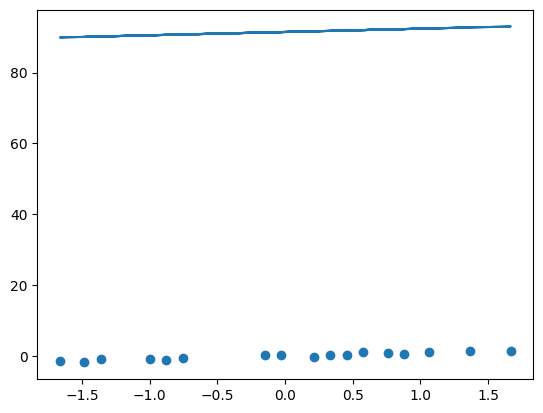

In [113]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [110]:
#Prediction for the Test data 
regression.fit(x_test,y_test)

LinearRegression(n_jobs=-1)

In [158]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


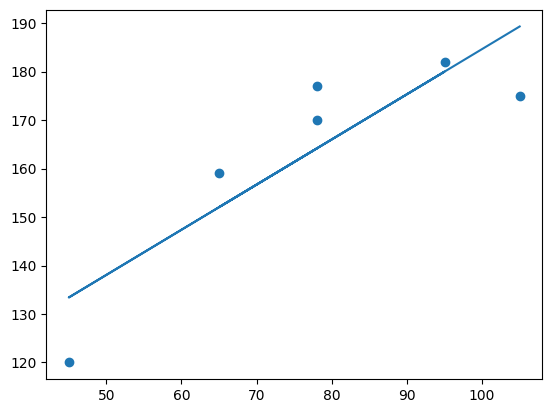

In [115]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regression.predict(x_test))

In [123]:
x_pred=regression.predict(x_test)
y_pred=regression.predict(y_test)
print(x_pred,y_pred)

[164.14386171 164.14386171 133.40155289 179.98080867 152.0332552
 189.29665983] [83.4528924  83.43282471 83.28948409 83.46722647 83.40128978 83.44715878]


In [114]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [126]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae,rmse)

92.07251561573389 92.07251572047632


In [ ]:
from sklearn.metrics import r2_score

In [130]:
print(y_test)

[[-8.61685115]
 [-8.63839259]
 [-8.79226004]
 [-8.6014644 ]
 [-8.67224343]
 [-8.62300585]]


In [131]:
print(y_pred)

[83.4528924  83.43282471 83.28948409 83.46722647 83.40128978 83.44715878]


In [129]:
score=r2_score(y_test,y_pred)
print(score)

-2057208.942321994


In [141]:
#Ols regression 
!pip install statsmodels

import statsmodels.api as sm

  Using cached statsmodels-0.14.5-cp39-cp39-macosx_11_0_arm64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.5-cp39-cp39-macosx_11_0_arm64.whl (9.8 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


In [144]:
prediction=(sm.OLS(X_train,y_train).fit())

In [149]:
res=(prediction.predict(x_test))
print(res)

[ 74.84866119  74.84866119  43.18191992  91.16183093  62.37388432
 100.75781314]


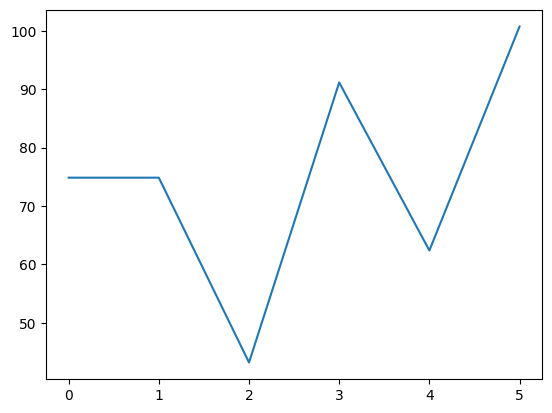

In [150]:
plt.plot(res)

In [151]:
print(prediction.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              186.1
Date:                Sun, 14 Sep 2025   Prob (F-statistic):                    3.14e-10
Time:                        20:32:48   Log-Likelihood:                         -2.5647
No. Observations:                  17   AIC:                                      7.129
Df Residuals:                      16   BIC:                                      7.963
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/anish/Documents/dev/pythonDev/.venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [156]:
regression.predict([[90]])

array([175.32288309])